# Rainsmore Workshop - Day 1


## Dataset #1 description

This dataset comprises transmit and receive signal levels of radio links and rainfall measurements in locations close to the links' ones. It is of interest to analyze the correlation between radio signal levels and rainfall volumes in order to use the former ones to predict the latter ones. The avalaible dataset is provided as a comma separated value (csv) file with different fiels which short description is provided below.

### Dataset field description

0.   **times**: Time stamp of the measurement.
1.   **sens**: Link identifier (290 A-B or 523 A-B for the current data).
2.   **TSL_mean**: Mean Transmitted Signal Level (TSL) in dBm.
3.   **RSL_mean**: Mean Received Signal Level in dBm.
4.   **Rgage**: The measurement of the rainfall for the nearest rain gauge in mm.
5.   **freq**: Frequency of operation of the link in GHz.
6.   **length**: Radio link length (distance from A to B) in km.
7.   **cfakr**: estimated coeffient $a$ of the theoretical relationship between specifit attenuation $k$ (dB/km) and rain rate $R$ in mm/h, given by $k=aR^b$.
8.   **cfbkr**: estimated coeffient $b$ of the theoretical relationship between specifit attenuation $k$ (dB/km) and rain rate $R$ in mm/h, given by $k=aR^b$.
9.   **link**: Link description.
10.  **gage**: Rain gauge identifier (neareast rain gauge).
11.  **dist**: Distance between the middle of the radio link and the nearest rain gauge.
12.  **code**: Link code (290 or 523 for the current data)
13.  **company**: Name of the company operating the radio link.

## Loading and preprocessing the dataset

In order to treat the data, we first load the data set and get a few information about the data contained therein.

In [748]:
## Configure matplotlib figure mode
%matplotlib notebook

# Import required packages
import numpy as np              # Multidimensional (vector, matrices, ...) array processing
import matplotlib.pyplot as plt # Figure plotting
import pandas as pd             # Dataframe processing

# Datasets are loaded as pandas dataframes from the (semicolon) comma separated value (csv) files
# Load the first data set
dataset1_link1 = pd.read_csv("Dataset_1_Link_AB_290_20210828_20210902.csv", sep=";")
# Show basic info about the dataset
dataset1_link1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   times     576 non-null    object 
 1   sens      576 non-null    object 
 2   TSL_mean  451 non-null    float64
 3   RSL_mean  451 non-null    float64
 4   Rgage     576 non-null    float64
 5   freq      576 non-null    float64
 6   length    576 non-null    float64
 7   cfakr     576 non-null    float64
 8   cfbkr     576 non-null    float64
 9   link      576 non-null    object 
 10  gage      576 non-null    object 
 11  dist      576 non-null    float64
 12  code      576 non-null    int64  
 13  company   576 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 63.1+ KB


In [749]:
# Load the second dataset
dataset1_link2 = pd.read_csv("Dataset_1_Link_AB_523_20210521_20210522.csv", sep=";")
# Show basic info about the dataset
dataset1_link2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   times     192 non-null    object 
 1   sens      192 non-null    object 
 2   TSL_mean  162 non-null    float64
 3   RSL_mean  162 non-null    float64
 4   Rgage     192 non-null    float64
 5   freq      192 non-null    int64  
 6   length    192 non-null    float64
 7   cfakr     192 non-null    float64
 8   cfbkr     192 non-null    float64
 9   link      192 non-null    object 
 10  gage      192 non-null    object 
 11  dist      192 non-null    float64
 12  code      192 non-null    int64  
 13  company   192 non-null    object 
dtypes: float64(7), int64(2), object(5)
memory usage: 21.1+ KB


In [750]:
# Show the first lines of the dataset
dataset1_link1.head()

,times,sens,TSL_mean,RSL_mean,Rgage,freq,length,cfakr,cfbkr,link,gage,dist,code,company
0,2021-08-28 00:10:00,290 A-B,5.0,-52.7,0.0,14.5,1.02,0.0473,1.1022,10G_MPR_NDOGBONG_3 - MPR_MISSOKE_UNIVERSITE_1,Meteo_IUT,0.193579,290,Orange
1,2021-08-28 00:25:00,290 A-B,5.0,-52.7,0.0,14.5,1.02,0.0473,1.1022,10G_MPR_NDOGBONG_3 - MPR_MISSOKE_UNIVERSITE_1,Meteo_IUT,0.193579,290,Orange
2,2021-08-28 00:40:00,290 A-B,5.0,-52.7,0.0,14.5,1.02,0.0473,1.1022,10G_MPR_NDOGBONG_3 - MPR_MISSOKE_UNIVERSITE_1,Meteo_IUT,0.193579,290,Orange
3,2021-08-28 00:55:00,290 A-B,5.0,-52.8,0.0,14.5,1.02,0.0473,1.1022,10G_MPR_NDOGBONG_3 - MPR_MISSOKE_UNIVERSITE_1,Meteo_IUT,0.193579,290,Orange
4,2021-08-28 01:10:00,290 A-B,5.0,-52.9,0.0,14.5,1.02,0.0473,1.1022,10G_MPR_NDOGBONG_3 - MPR_MISSOKE_UNIVERSITE_1,Meteo_IUT,0.193579,290,Orange


In [751]:
# Show the first lines of the dataset
dataset1_link2.head()

,times,sens,TSL_mean,RSL_mean,Rgage,freq,length,cfakr,cfbkr,link,gage,dist,code,company
0,2021-05-21 00:10:00,523 A-B,8.0,-37.9,0.0,18,0.41,0.0781,1.0654,10G_MPR_NDOGBONG_2 - MPR_NDOGBONG-SEVEN,Meteo_IUT,0.511151,523,Orange
1,2021-05-21 00:25:00,523 A-B,8.0,-37.9,0.0,18,0.41,0.0781,1.0654,10G_MPR_NDOGBONG_2 - MPR_NDOGBONG-SEVEN,Meteo_IUT,0.511151,523,Orange
2,2021-05-21 00:40:00,523 A-B,8.0,-37.9,0.0,18,0.41,0.0781,1.0654,10G_MPR_NDOGBONG_2 - MPR_NDOGBONG-SEVEN,Meteo_IUT,0.511151,523,Orange
3,2021-05-21 00:55:00,523 A-B,8.0,-37.9,0.0,18,0.41,0.0781,1.0654,10G_MPR_NDOGBONG_2 - MPR_NDOGBONG-SEVEN,Meteo_IUT,0.511151,523,Orange
4,2021-05-21 01:10:00,523 A-B,8.0,-37.9,0.0,18,0.41,0.0781,1.0654,10G_MPR_NDOGBONG_2 - MPR_NDOGBONG-SEVEN,Meteo_IUT,0.511151,523,Orange


In order to preserve the original data, we will make a work copy of the dataset and remove therefrom data that is not relevant or that is constant and can be recovered a single time when required.

In [752]:
# Work copy of the dataset for link 1
df1 = dataset1_link1.copy()
# Save relevant constant data as scalar variables
meanTSL = dataset1_link2['TSL_mean'][0]
Freq = dataset1_link2['freq'][0]
Len = dataset1_link2['length'][0]
coeffA = dataset1_link2['cfakr'][0]
coeffB = dataset1_link2['cfbkr'][0]
Dist = dataset1_link2['dist'][0]
# Drop the columns that are not relevant for the subsequent calculations
fields = ['sens', 'TSL_mean', 'freq', 'length', 'cfakr', 'cfbkr', 'link', 'gage', 'dist', 'code', 'company']
df1.drop(fields, axis=1, inplace=True)

Considering the relevant rainfall and radio link data, we can see how the look like.

<IPython.core.display.Javascript object>


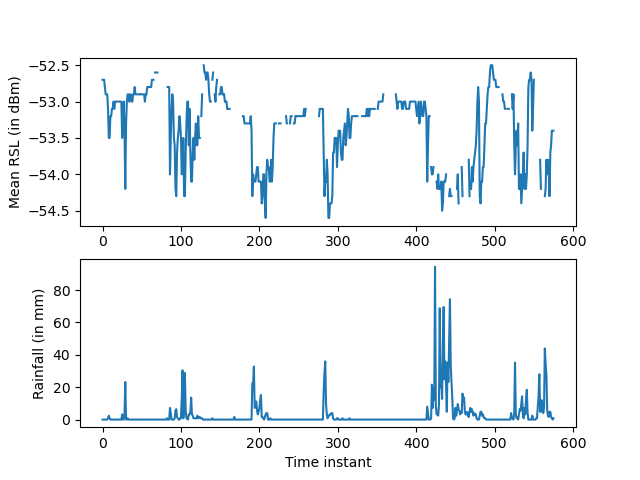

Text(0.5, 0, 'Time instant')

In [753]:
# Create a figure with two subplots
fig, axs = plt.subplots(2)

# Plot mean RSL for each time stamp
axs[0].plot(df1['RSL_mean'])
axs[0].set_ylabel('Mean RSL (in dBm)')

# Plot rainfall gage measurement for each time stamp
axs[1].plot(df1['Rgage'])
axs[1].set_ylabel('Rainfall (in mm)')

# Set common x-axis label
axs[1].set_xlabel('Time instant')

As we can see, for this dataset there are a few missing values for mean RSL, which correspond to link measurement failures. In order to obtain and estimate of the parameters for the provided data, we will filter out the rows with missing data which rows are shown below.

In [754]:
df1[pd.isna(df1['RSL_mean']) | pd.isna(df1['Rgage'])]

,times,RSL_mean,Rgage
48,2021-08-28 12:10:00,NaN,0.0
59,2021-08-28 14:55:00,NaN,0.0
66,2021-08-28 16:40:00,NaN,0.0
71,2021-08-28 17:55:00,NaN,0.0
72,2021-08-28 18:10:00,NaN,0.0
...,...,...,...
557,2021-09-02 19:25:00,NaN,28.0
560,2021-09-02 20:10:00,NaN,12.0
561,2021-09-02 20:25:00,NaN,7.2
562,2021-09-02 20:40:00,NaN,4.0


Now we drop the rows with the missing data and can replot the filtered data as follows.

<IPython.core.display.Javascript object>


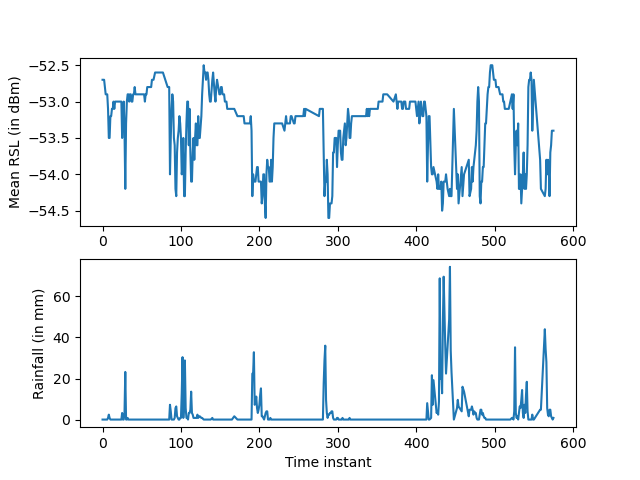

Text(0.5, 0, 'Time instant')

In [755]:
# Drop rows with missing data
df1.drop(df1[pd.isna(df1['RSL_mean']) | pd.isna(df1['Rgage'])].index, inplace=True)

# Create a figure with two subplots
fig, axs = plt.subplots(2)

# Plot mean RSL for each time stamp
axs[0].plot(df1['RSL_mean'])
axs[0].set_ylabel('Mean RSL (in dBm)')

# Plot rainfall gage measurement for each time stamp
axs[1].plot(df1['Rgage'])
axs[1].set_ylabel('Rainfall (in mm)')

# Set common x-axis label
axs[1].set_xlabel('Time instant')

For a radio link, the mean received signal level $P_R(d)$ can be expressed as $P_R(d) = P_T - P_L(d) = P_T - 10 k\log_{10}(d)$, where $P_T$ is the transmit power and $P_L(d)$ is the path loss at a distance $d$. Thus, we can write $\displaystyle P_L(d) = P_T - P_R(d)$. According to the rainfall model, the specific attenuation $k$ in dB/km relates to the rainfall by $k = a R^b \Rightarrow \ln(PL/d) = \ln(a) + b \ln(R), R > 0$.

<IPython.core.display.Javascript object>


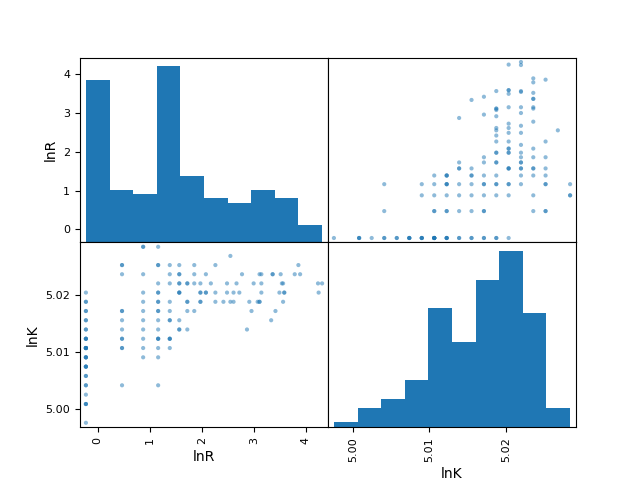

array([[<AxesSubplot:xlabel='lnR', ylabel='lnR'>,
        <AxesSubplot:xlabel='lnK', ylabel='lnR'>],
       [<AxesSubplot:xlabel='lnR', ylabel='lnK'>,
        <AxesSubplot:xlabel='lnK', ylabel='lnK'>]], dtype=object)

In [756]:
# Drop rows with zero data
df1.drop(df1[df1['Rgage'] == 0].index, inplace = True)
# Define PL field
df1['lnK'] = np.log((meanTSL - df1.RSL_mean)/Len)
# Define the log10(R) field
df1['lnR'] = np.log(df1.Rgage)
# Plot the histogram and cross correlation of the two new calculated fields
pd.plotting.scatter_matrix(df1[['lnR', 'lnK']])

Considering the remaining data, the coefficients of the model can be obtained by simple linear regression using ```numpy.polyfit``` as follows.

In [757]:
# Perform linear regresssion
coeff = np.polyfit(df1['lnR'], df1['lnK'], deg=1)
print(coeff)
b = coeff[0]
a = coeff[1]
print(a, b)

[3.03245307e-03 5.01259569e+00]
5.012595693021611 0.0030324530707485963


<IPython.core.display.Javascript object>


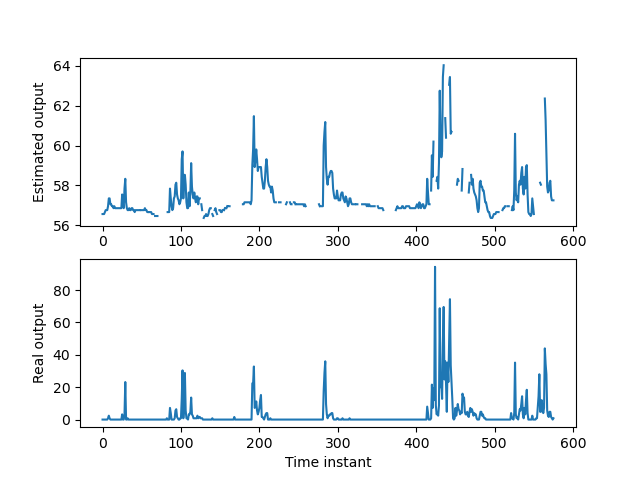

Text(0.5, 0, 'Time instant')

In [758]:
# Since the data used was normalized and freed from their means, estimates the R factor based on b only, ignoring a,
# rescale the data, and plot the results
dataset1_link1['Est_Out'] = np.exp((1/b)*((dataset1_link1['TSL_mean'] - dataset1_link1['RSL_mean'])/(dataset1_link1['length']*a))

# Create a figure with two subplots
fig, axs = plt.subplots(2)

# Plot mean RSL for each time stamp
axs[0].plot(dataset1_link1['Est_Out'])
axs[0].set_ylabel('Estimated output')

# Plot rainfall gage measurement for each time stamp
axs[1].plot(dataset1_link1['Rgage'])
axs[1].set_ylabel('Real output')

# Set common x-axis label
axs[1].set_xlabel('Time instant')